In [37]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [38]:
# Load the CNN model
model = tf.keras.models.load_model('CNNIFTH2.h5', compile=False)

In [39]:
# Load Training and test data from Excel files
# Load data from an Excel file
dataTr = pd.read_excel('TrainingDataCNNIFTH2.xlsx')
dataTs = pd.read_excel('TestDataCNNIFTH2.xlsx')
features = ['P (MPa)','T (K)','Salinity, Molality (mol/kg)','avg. critical temperature (Tcm, K)']
target = ['IFT (mN/m)']
XTr = dataTr[features]
y_train = dataTr[target]
XTs = dataTs[features]
y_test = dataTs[target]

In [40]:
preprocessor = ColumnTransformer([
    ('numeric', Pipeline([('scaler', RobustScaler())]), XTr.columns)
])

In [41]:
XnorTr = preprocessor.fit_transform(XTr)
XnorTs = preprocessor.transform(XTs)

featuresTr = XnorTr.reshape(XnorTr.shape[0], XnorTr.shape[1], 1)  # Add the channel dimension
featuresTs = XnorTs.reshape(XnorTs.shape[0], XnorTs.shape[1], 1)  # Add the channel dimension

In [42]:
pred_train = model.predict(featuresTr)
pred_test = model.predict(featuresTs)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


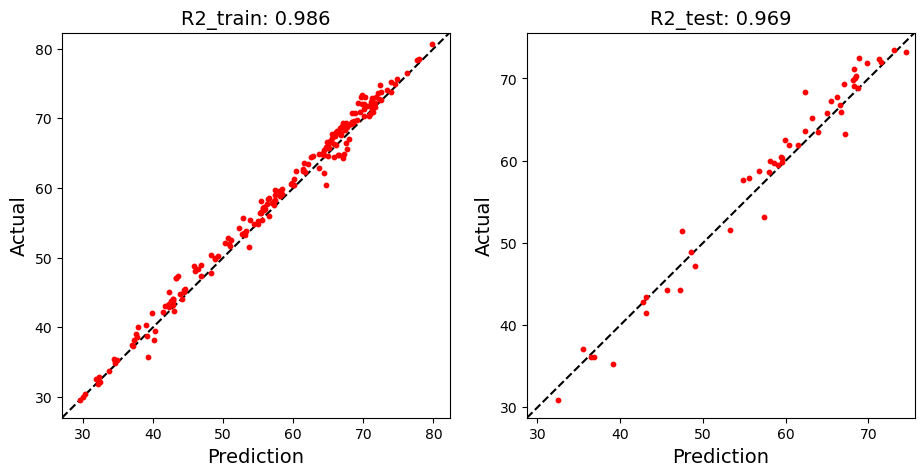

In [43]:
# Display the cross plots of training and test
train_labels = y_train
test_labels = y_test

plt.figure(figsize=(11, 5))

plt.subplot(121)
plt.scatter(pred_train, y_train, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_train: {r2_score(train_labels, pred_train):.3f}", fontsize=14)

plt.subplot(122)
plt.scatter(pred_test, y_test, c='r', s=10)
x1, x2 = plt.xlim()
y1, y2 = plt.ylim()
lim = min(x1, y1), min(x2, y2)
plt.xlim(*lim)
plt.ylim(*lim)
plt.plot(lim, lim, 'k--', zorder=-1)
plt.xlabel("Prediction", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.title(f"R2_test: {r2_score(test_labels, pred_test):.3f}", fontsize=14);
plt.show()

In [44]:
# Load Other data to check the model from an Excel file: This is just an example how to apply the model for other data with unknown IFT value
dataOther = pd.read_excel('OtherDataIFTH2CNN.xlsx')  # Replace 'data.xlsx' with your file path
dataOther

,P (MPa),T (K),"Salinity, Molality (mol/kg)","avg. critical temperature (Tcm, K)"
0,13.79,353.15,3.15,222.9


In [45]:
# Split the data into features
features = ['P (MPa)','T (K)','Salinity, Molality (mol/kg)','avg. critical temperature (Tcm, K)']
X = dataOther[features]

In [46]:
X = preprocessor.transform(X)
featuresOther = X.reshape(X.shape[0], X.shape[1], 1)  # Add the channel dimension

In [47]:
# Make predictions 
predIFT = model.predict(featuresOther)
print(predIFT)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[[34.480152]]
